In [4]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
import os 
from langgraph.checkpoint.memory import InMemorySaver #checkpointer

In [2]:
load_dotenv()

llm = ChatOpenAI( model="Qwen/Qwen2.5-7B-Instruct:together", api_key=os.environ["HF_TOKEN"], base_url="https://router.huggingface.co/v1" )

In [3]:
class JokeState(TypedDict):
    topic: str
    joke: str
    exp: str

In [7]:
def generate_joke(State: JokeState):

    #give a topic to the llm
    topic = State["topic"]
    #Generate the joke on that topic
    prompt = f"Generate a hillarious and humorous joke about {topic}."
    response = llm.invoke(prompt)
    #Return the state with updated joke
    return {"joke": response.content}

In [8]:
def explain_joke(State: JokeState):

    prompt = f"Explain the following joke in a detailed manner: {State['joke']}"
    response = llm.invoke(prompt)
    return {"exp": response.content}

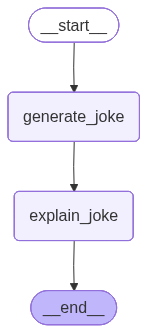

In [13]:
graph = StateGraph(JokeState)

graph.add_node('generate_joke', generate_joke)
graph.add_node('explain_joke', explain_joke)

graph.add_edge(START, 'generate_joke')
graph.add_edge('generate_joke', 'explain_joke')
graph.add_edge('explain_joke', END)

checkpointer = InMemorySaver() # we are saving intermediate and state values in the memory using the InMemorySaver

workflow= graph.compile(checkpointer=checkpointer)
workflow

In [16]:
config1 = {"configurable": {"thread_id": 1}}
workflow.invoke({"topic": "programming"}, config=config1)

{'topic': 'programming',
 'joke': "Why did the programmer quit his job?\n\nBecause he didn't get arrays.",
 'exp': 'This joke is a play on words and a common programming pun. Let\'s break it down in detail:\n\n1. **Context and Setting**: The joke is set in a workplace environment, specifically a programming job. Programmers are known for their deep understanding of computer science and programming languages, which often involve complex concepts like data structures and algorithms.\n\n2. **Key Terms**:\n   - **Programmer**: A person who writes computer programs.\n   - **Quit**: To leave a job or position.\n   - **Arrays**: A fundamental data structure in computer science and programming. An array is a collection of elements (values or variables) of the same type stored at contiguous memory locations. Each element can be accessed by an index.\n\n3. **The Joke**:\n   - The punchline, "Because he didn\'t get arrays," is a clever play on the phrase "didn\'t get," which can mean not understa

In [ ]:
workflow.get_state(config1) # final values

StateSnapshot(values={'topic': 'programming', 'joke': "Why did the programmer quit his job?\n\nBecause he didn't get arrays.", 'exp': 'This joke is a play on words and a common programming pun. Let\'s break it down in detail:\n\n1. **Context and Setting**: The joke is set in a workplace environment, specifically a programming job. Programmers are known for their deep understanding of computer science and programming languages, which often involve complex concepts like data structures and algorithms.\n\n2. **Key Terms**:\n   - **Programmer**: A person who writes computer programs.\n   - **Quit**: To leave a job or position.\n   - **Arrays**: A fundamental data structure in computer science and programming. An array is a collection of elements (values or variables) of the same type stored at contiguous memory locations. Each element can be accessed by an index.\n\n3. **The Joke**:\n   - The punchline, "Because he didn\'t get arrays," is a clever play on the phrase "didn\'t get," which ca

In [20]:
list(workflow.get_state_history(config1)) # all values in the history of the workflow for config1

[StateSnapshot(values={'topic': 'programming', 'joke': "Why did the programmer quit his job?\n\nBecause he didn't get arrays.", 'exp': 'This joke is a play on words and a common programming pun. Let\'s break it down in detail:\n\n1. **Context and Setting**: The joke is set in a workplace environment, specifically a programming job. Programmers are known for their deep understanding of computer science and programming languages, which often involve complex concepts like data structures and algorithms.\n\n2. **Key Terms**:\n   - **Programmer**: A person who writes computer programs.\n   - **Quit**: To leave a job or position.\n   - **Arrays**: A fundamental data structure in computer science and programming. An array is a collection of elements (values or variables) of the same type stored at contiguous memory locations. Each element can be accessed by an index.\n\n3. **The Joke**:\n   - The punchline, "Because he didn\'t get arrays," is a clever play on the phrase "didn\'t get," which c